In [1]:
# Data source

# P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
#   Modeling wine preferences by data mining from physicochemical properties.
#   In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.
#
#   Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
#                 [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
#                 [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib


In [10]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
# Get data from csv file

red_data = pd.read_csv("wine+quality/winequality-red.csv", sep = ";", header = 0)
white_data = pd.read_csv("wine+quality/winequality-white.csv", sep = ";", header = 0)

print(red_data.columns)
print(red_data.values)
print(white_data.values)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
[[ 7.4    0.7    0.    ...  0.56   9.4    5.   ]
 [ 7.8    0.88   0.    ...  0.68   9.8    5.   ]
 [ 7.8    0.76   0.04  ...  0.65   9.8    5.   ]
 ...
 [ 6.3    0.51   0.13  ...  0.75  11.     6.   ]
 [ 5.9    0.645  0.12  ...  0.71  10.2    5.   ]
 [ 6.     0.31   0.47  ...  0.66  11.     6.   ]]
[[ 7.    0.27  0.36 ...  0.45  8.8   6.  ]
 [ 6.3   0.3   0.34 ...  0.49  9.5   6.  ]
 [ 8.1   0.28  0.4  ...  0.44 10.1   6.  ]
 ...
 [ 6.5   0.24  0.19 ...  0.46  9.4   6.  ]
 [ 5.5   0.29  0.3  ...  0.38 12.8   7.  ]
 [ 6.    0.21  0.38 ...  0.32 11.8   6.  ]]


In [4]:
# Clean data



In [5]:
# Split test data from training data

red_training_data, red_test_data = train_test_split(red_data, test_size = 0.2, random_state = 0)
white_training_data, white_test_data = train_test_split(white_data, test_size = 0.2, random_state = 0)

print("red data")
print(red_data.size)
print(red_training_data.size)
print(red_test_data.size)
print()
print("white data")
print(white_data.size)
print(white_training_data.size)
print(white_test_data.size)

red data
19188
15348
3840

white data
58776
47016
11760


In [6]:
# create decision tree

random_forest = RandomForestClassifier()

# fit red data to random forest by splitting the values (data for testing, actual result)
random_forest.fit(red_training_data.drop('quality', axis=1), red_training_data["quality"])

RandomForestClassifier()

Accuracy:  1.0


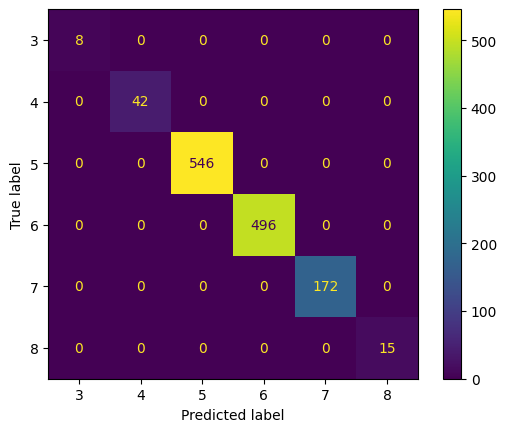

In [12]:
# Show confusion matrix

actual = red_training_data['quality']
prediction = random_forest.predict(red_training_data.drop('quality', axis=1))

cm = confusion_matrix(actual, prediction)

display_labels = np.unique(actual)

display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = display_labels)
print("Accuracy: ", accuracy_score(prediction, actual))

display.plot()